In [1]:
info = {
 "title": "Stary Night",
 "author": "Alex Carney",
 "github_username": "alcarney",
 "stylo_version": "0.9.0",
 "dimensions": (1920, 1080)
}

In [2]:
import numpy as np
import numpy.random as npr
from math import pi, sin, cos

from stylo.domain.transform import translate
from stylo.color import FillColor
from stylo.shape import Circle, Triangle, Shape
from stylo.image import LayeredImage
from stylo.math import lerp

In [3]:
moon_color = FillColor("ffffaa")

In [4]:
moon_x = 1
moon_y = 0.65
moon = Circle(x=moon_x, y=moon_y, r=0.4, fill=True) \
     & ~Circle(x=moon_x + 0.05, y=moon_y + 0.05, fill=True, r=0.4)

In [5]:
class Star(Shape):
    
    def __init__(self, scale=1):
        self.scale = scale
    
    def draw(self):
        
        t1 = Triangle((0.5, 0), (-0.5, 0), (0, 0.75))
        t2 = Triangle((0.5, 0.5), (-0.5, 0.5), (0, -0.25))
        
        def star(x, y):
            
            x = x / self.scale
            y = y / self.scale
            
            return np.logical_or(t1(x=x, y=y), t2(x=x, y=y))
            
        return star
    
star = Star(scale=0.1) 

In [6]:
xs = lerp(-1.8, 0.9)
ys = lerp(-1, 1)
scale = lerp(0.07, 0.03)

In [7]:
npr.seed(128)
N = 30

stars = np.zeros((N, 3))
stars[:, 0] = xs(npr.rand(N))
stars[:, 1] = ys(npr.rand(N))
stars[:, 2] = scale(npr.rand(N))

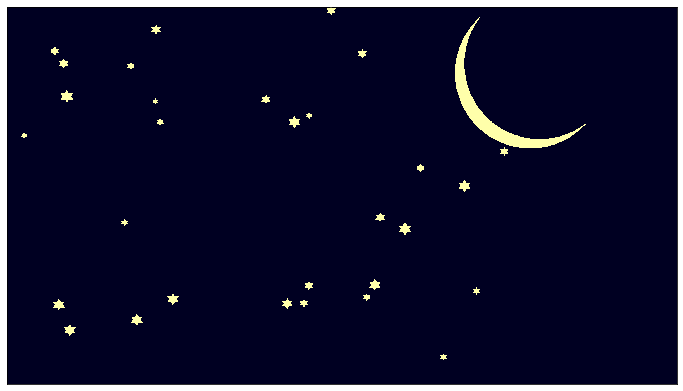

In [8]:
image = LayeredImage(background="000022")

image.add_layer(moon, moon_color)

for p in stars:
    star = Star(scale=p[2]) >> translate(p[0], p[1])
    image.add_layer(star, moon_color)
